# 分类 Fashion-MNIST 数据集

现在轮到你来构建一个神经网络了。你将使用的是 [Fashion-MNIST 数据集](https://github.com/zalandoresearch/fashion-mnist)，这是 MNIST 数据集的替代品。对于神经网络而言，原始的 MNIST 数据集体量太小，因而你可以轻易达到 97% 以上的准确率。而 Fashion-MNIST 数据集是一组有关衣物的 28x28 灰阶图像。这个数据集比 MNIST 复杂得多，因此你能更好地判断神经网络的性能，它也更加接近你在现实世界中使用的数据集。

<img src='assets/fashion-mnist-sprite.png' width=500px>

在这个 notebook 中，你将构建专属于你的神经网络。在大多数情况下，你可以直接复制粘贴第三部分的代码，但这样一来你很难学到知识。因此我们推荐你自己编写代码来运行程序，这十分重要。不过在完成这个任务时，你也可以随时查阅和参考之前的 notebook。

首先，我们通过 torchvision 来加载数据集。

In [2]:
import torch
from torchvision import datasets, transforms
import helper

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
# Download and load the training data
trainset = datasets.FashionMNIST('F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

在这里，我们能看到其中一张图片。

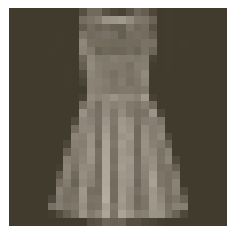

In [3]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

在加载数据之后，我们应该导入一些必要的包了。

In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import numpy as np
import time

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torch.autograd import Variable
from torchvision import datasets, transforms

import helper

## 构建网络

在这里，你应该定义你的网络。如同 MNIST 数据集一样，这里的每张图片的像素为 28x28，共有 784 个像素点和 10 个类。你至少需要添加一个隐藏层。对于这些层，我们推荐你使用 ReLU 激活函数，并通过前向传播来返回 logits。层的数量和大小都由你来决定。

In [5]:
# TODO: Define your network architecture here
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        # Defining the layers, 128, 64, 10 units each
        self.fc1 = nn.Linear(784, 128)
        self.fc2 = nn.Linear(128, 64)
        # Output layer, 10 units - one for each digit
        self.fc3 = nn.Linear(64, 10)
        
    def forward(self, x):
        ''' Forward pass through the network, returns the output logits '''
        
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        
        return x
    
    def predict(self, x):
        ''' This function for predicts classes by calculating the softmax '''
        logits = self.forward(x)
        return F.softmax(logits)

net = Network()
net

Network(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

In [6]:
print(net.fc1.weight)
print(net.fc1.bias)

Parameter containing:
tensor([[-7.1883e-03, -1.1522e-02, -7.0891e-03,  ..., -7.0678e-03,
         -1.5059e-02, -1.4253e-02],
        [ 1.0657e-02, -5.8981e-03,  5.9034e-03,  ..., -9.3445e-03,
         -3.3796e-02,  3.0753e-02],
        [ 1.3804e-02, -2.1585e-02,  2.7654e-02,  ...,  1.9582e-02,
          3.7458e-03, -1.3875e-02],
        ...,
        [ 2.4184e-02,  2.6154e-02, -1.6998e-02,  ..., -5.3618e-03,
          1.4961e-02,  3.2446e-02],
        [-2.0811e-02,  3.4165e-02,  2.8884e-02,  ..., -1.4734e-02,
          1.2616e-02,  1.5796e-02],
        [ 2.3024e-02, -1.3024e-02,  3.3151e-02,  ..., -3.0689e-02,
          6.5437e-03, -4.8990e-03]])
Parameter containing:
tensor(1.00000e-02 *
       [-1.8494, -2.6631, -3.4083, -0.8269, -3.4513,  0.1250,  3.0533,
        -0.6351, -1.5005,  3.2649,  2.9283, -3.4024, -0.1169, -2.7047,
        -1.1083,  3.4056,  3.0476, -1.4960, -0.8509, -2.4540,  2.0241,
        -2.6404,  3.3864, -0.6083,  1.8169,  2.5730, -1.2109, -2.2448,
         0.1166, -3

In [7]:
# Set biases to all zeros
net.fc1.bias.data.fill_(0)

tensor([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [8]:
# sample from random normal with standard dev = 0.01
net.fc1.weight.data.normal_(std=0.01)

tensor([[ 4.0753e-03,  1.1940e-02,  4.7161e-03,  ...,  8.1524e-03,
          1.4494e-02, -6.3261e-03],
        [ 4.8832e-03,  2.8041e-03, -6.0508e-03,  ...,  1.2329e-02,
          4.1735e-03,  1.2499e-02],
        [-1.6625e-02, -1.6481e-03, -8.6962e-03,  ...,  2.8980e-04,
          9.6174e-03,  5.7005e-03],
        ...,
        [-3.2283e-03, -1.6458e-03,  2.9085e-04,  ...,  5.1296e-03,
          1.5853e-02, -7.5727e-03],
        [ 1.6626e-02, -1.5926e-02,  5.5185e-03,  ..., -9.3805e-04,
         -3.6095e-03,  1.2628e-02],
        [ 6.8973e-03,  1.2081e-03, -1.2460e-02,  ..., -1.3706e-02,
          2.4972e-03, -1.5012e-03]])

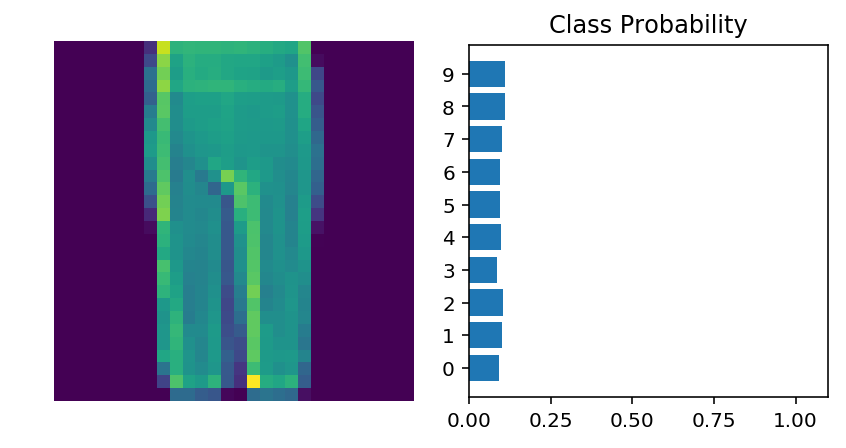

In [9]:
# Grab some data 
dataiter = iter(trainloader)
images, labels = dataiter.next()
images.resize_(64, 1, 784)

# Need to wrap it in a Variable, will explain in next notebook
inputs = Variable(images) 

# Forward pass through the network
img_idx = 0
logits = net.forward(inputs[img_idx,:])

# Predict the class from the network output
ps = F.softmax(logits, dim=1)

img = images[img_idx]
helper.view_classify(img.resize_(1, 28, 28), ps)

# 训练网络

现在，你应该构建你的网络并训练它了。首先，你需要定义[条件](http://pytorch.org/docs/master/nn.html#loss-functions)（比如 `nn.CrossEntropyLoss`）以及[优化器](http://pytorch.org/docs/master/optim.html)（比如 `optim.SGD` 或 `optim.Adam`）。

接着，你需要编写训练代码。请记住，训练传播是一个十分简明的过程：

* 在网络中进行前向传播来获取 logits 
* 使用 logits 来计算损失
* 使用 `loss.backward()` 在网络中进行后向传播来计算梯度
* 使用优化器执行一个学习步来更新权重

通过调整超参数（隐藏单元、学习速率等），你应该可以将训练损失控制在 0.4 以下。

In [20]:
# TODO: Create the network, define the criterion and optimizer
net = Network()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.08)

In [21]:
# TODO: Train the network here
epochs = 2
steps = 0
running_loss = 0
print_every = 80
for e in range(epochs):
    for images, labels in iter(trainloader):
        steps += 1
        # Flatten MNIST images into a 784 long vector
        images.resize_(images.size()[0], 784)
        
        # Wrap images and labels in Variables so we can calculate gradients
        inputs = Variable(images)
        targets = Variable(labels)
        optimizer.zero_grad()
        
        output = net.forward(inputs)
        loss = criterion(output, targets)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.data[0]
        
        if steps % print_every == 0:
            # Test accuracy
            accuracy = 0
            for ii, (images, labels) in enumerate(testloader):
                
                images = images.resize_(images.size()[0], 784)
                inputs = Variable(images, volatile=True)
                
                predicted = net.predict(inputs).data
                equality = (labels == predicted.max(1)[1])
                accuracy += equality.type_as(torch.FloatTensor()).mean()
            
            print("Epoch: {}/{}".format(e+1, epochs),
                  "Loss: {:.4f}".format(running_loss/print_every),
                  "Test accuracy: {:.4f}".format(accuracy/(ii+1)))
            running_loss = 0

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:22: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:30: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch: 1/2 Loss: 1.2316 Test accuracy: 0.6579
Epoch: 1/2 Loss: 0.7370 Test accuracy: 0.7489
Epoch: 1/2 Loss: 0.6254 Test accuracy: 0.7350
Epoch: 1/2 Loss: 0.5964 Test accuracy: 0.7969
Epoch: 1/2 Loss: 0.5646 Test accuracy: 0.7784
Epoch: 1/2 Loss: 0.5339 Test accuracy: 0.7889
Epoch: 1/2 Loss: 0.4960 Test accuracy: 0.8194
Epoch: 1/2 Loss: 0.4943 Test accuracy: 0.8125
Epoch: 1/2 Loss: 0.4801 Test accuracy: 0.7972
Epoch: 1/2 Loss: 0.4672 Test accuracy: 0.8162
Epoch: 1/2 Loss: 0.4525 Test accuracy: 0.8280
Epoch: 2/2 Loss: 0.4604 Test accuracy: 0.8323
Epoch: 2/2 Loss: 0.4239 Test accuracy: 0.8116
Epoch: 2/2 Loss: 0.4417 Test accuracy: 0.8326
Epoch: 2/2 Loss: 0.4139 Test accuracy: 0.8339
Epoch: 2/2 Loss: 0.4266 Test accuracy: 0.8345
Epoch: 2/2 Loss: 0.4022 Test accuracy: 0.8130
Epoch: 2/2 Loss: 0.4153 Test accuracy: 0.8386
Epoch: 2/2 Loss: 0.4287 Test accuracy: 0.8428
Epoch: 2/2 Loss: 0.4169 Test accuracy: 0.8436
Epoch: 2/2 Loss: 0.3911 Test accuracy: 0.8487
Epoch: 2/2 Loss: 0.3957 Test accur

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:25: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


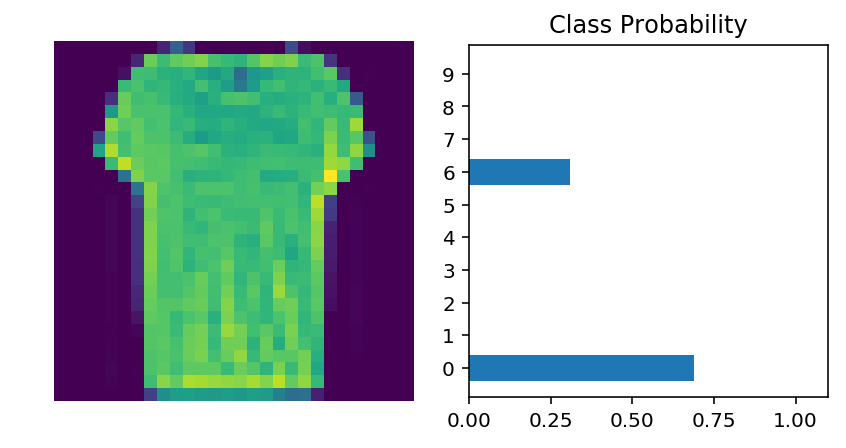

In [31]:
# Test out your network!

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)

# TODO: Calculate the class probabilities (softmax) for img
ps = net.predict(Variable(img))

# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), ps)

训练好神经网络之后，你应该希望保存这个网络以便下次加载，而不是重新训练。很明显，每次使用时都重新训练网络并不现实。在实际操作中，你将会在训练网络之后将模型保存，接着重新加载网络以进行训练或是预测。在下一部分，我将为你展示如何保存和加载训练好的模型。